In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/us_etf_data/SPY.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6.648000e+03
mean,133.762935,134.541071,132.893598,133.759854,110.399391,8.440122e+07
std,59.488006,59.671285,59.277882,59.492056,64.113369,9.837713e+07
min,43.343750,43.531250,42.812500,43.406250,26.383823,5.200000e+03
25%,96.780937,97.735000,95.726562,96.921875,71.256485,6.966775e+06
50%,124.433750,125.335938,123.500000,124.312500,93.641503,5.709990e+07
75%,151.702503,152.514999,150.810624,151.791713,125.251474,1.229908e+08
max,296.040009,296.309998,293.760010,295.859985,294.427979,8.710263e+08


In [5]:
df['CODE'] = 'SPY'

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CODE
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200,SPY
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500,SPY
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300,SPY
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400,SPY
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500,SPY


In [7]:
price_df = df.loc[:,['Date','Adj Close']].copy()

In [8]:
price_df.head()

,Date,Adj Close
0,1993-01-29,26.706757
1,1993-02-01,26.896694
2,1993-02-02,26.953669
3,1993-02-03,27.238594
4,1993-02-04,27.352570


In [9]:
# price_df['DATE'] = price_df['DATE'].map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))

In [10]:
price_df.set_index(['Date'],inplace=True)

In [11]:
price_df.head()

,Adj Close
Date,
1993-01-29,26.706757
1993-02-01,26.896694
1993-02-02,26.953669
1993-02-03,27.238594
1993-02-04,27.352570


In [12]:
price_df['center'] = price_df['Adj Close'].rolling(20).mean() # 이동평균선을 구한다.

In [13]:
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,26.953669,NaN
1993-02-26,26.991682,26.910942
1993-03-01,26.915695,26.921389
1993-03-02,27.314577,26.942283
1993-03-03,27.428545,26.966027
1993-03-04,27.276592,26.967927
1993-03-05,27.200619,26.960329


In [14]:
# +2 표준편차를 둔 상단 밴드를 구한다.
price_df['ub'] = price_df['center'] + 2 * price_df['Adj Close'].rolling(20).std() 

In [15]:
price_df.iloc[18:25]

,Adj Close,center,ub
Date,,,
1993-02-25,26.953669,NaN,NaN
1993-02-26,26.991682,26.910942,27.598068
1993-03-01,26.915695,26.921389,27.601764
1993-03-02,27.314577,26.942283,27.644772
1993-03-03,27.428545,26.966027,27.701465
1993-03-04,27.276592,26.967927,27.706519
1993-03-05,27.200619,26.960329,27.685261


In [16]:
# -2 표준편차를 둔 하단 밴드를 구한다.
price_df['lb'] = price_df['center'] - 2 * price_df['Adj Close'].rolling(20).std()
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
1993-02-25,26.953669,NaN,NaN,NaN
1993-02-26,26.991682,26.910942,27.598068,26.223816
1993-03-01,26.915695,26.921389,27.601764,26.241013
1993-03-02,27.314577,26.942283,27.644772,26.239794
1993-03-03,27.428545,26.966027,27.701465,26.230589
1993-03-04,27.276592,26.967927,27.706519,26.229334
1993-03-05,27.200619,26.960329,27.685261,26.235397


In [17]:
n = 20
sigma = 2

In [18]:
def bollinger_band(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Adj Close'].rolling(n).mean() #중앙 이동평균선
    bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(n).std() # 상단 밴드
    bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(n).std() # 하단 밴드
    return bb

In [19]:
bollinger = bollinger_band(price_df, n, sigma)

In [20]:
bollinger.head(21)

,Adj Close,center,ub,lb
Date,,,,
1993-01-29,26.706757,NaN,NaN,NaN
1993-02-01,26.896694,NaN,NaN,NaN
1993-02-02,26.953669,NaN,NaN,NaN
1993-02-03,27.238594,NaN,NaN,NaN
1993-02-04,27.352570,NaN,NaN,NaN
1993-02-05,27.333586,NaN,NaN,NaN
1993-02-08,27.333586,NaN,NaN,NaN
1993-02-09,27.143635,NaN,NaN,NaN
1993-02-10,27.181616,NaN,NaN,NaN


In [21]:
base_date = '2009-01-02'

In [22]:
sample = bollinger.loc[base_date:]
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,75.099487,71.378963,74.538229,68.219698
2009-01-05,75.010582,71.711677,74.931608,68.491746
2009-01-06,75.511505,71.964058,75.543401,68.384716
2009-01-07,73.249435,71.980327,75.580937,68.379718
2009-01-08,73.548378,72.071645,75.736733,68.406557


In [23]:
book = sample[['Adj Close']].copy()

In [24]:
book['trade'] = '' #거래내역 컬럼

In [25]:
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [26]:
def create_trade_book(sample):
    book = sample[['Adj Close']].copy()
    book['trade'] = ''
    return (book)    

In [27]:
book = create_trade_book(sample)

In [28]:
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [29]:
# if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']:
#     book.loc[i, 'trade'] = ''

In [30]:
# elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']:
#     if book.shift(1).loc[i, 'trade'] == 'buy':    
#         book.loc[i, 'trade'] = 'buy'     
#     else:
#         book.loc[i, 'trade'] = 'ready'    

In [31]:
# elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and 
#         sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']:
#     if book.shift(1).loc[i, 'trade'] == 'buy' or book.shift(1).loc[i, 'trade'] == 'ready':
#         book.loc[i, 'trade'] = 'buy'
#     else:
#         book.loc[i, 'trade'] = ''

In [32]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']: # 상단밴드 이탈시 동작 안함
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']: # 하반밴드 이탈시 매수
            if book.shift(1).loc[i, 'trade'] == 'buy':    # 이미 매수상태라면
                book.loc[i, 'trade'] = 'buy'     # 매수상태 유지
            else:
                book.loc[i, 'trade'] = 'buy'    
        elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']: # 볼린저 밴드 안에 있을 시
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'  # 매수상태 유지
            else:
                book.loc[i, 'trade'] = '' # 동작 안함
    return (book) 

In [33]:
book = tradings(sample,book)

In [34]:
book.tail(10)

,Adj Close,trade
Date,,
2019-06-11,287.501678,buy
2019-06-12,286.994171,buy
2019-06-13,288.178375,buy
2019-06-14,287.859955,buy
2019-06-17,287.969391,buy
2019-06-18,290.984741,buy
2019-06-19,291.641541,buy
2019-06-20,294.427979,buy
2019-06-21,294.000000,buy


In [35]:
# rtn = 1.0
# book['return'] = 1
# buy = 0.0
# sell = 0.0

In [36]:
# for i in book.index:
#     if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == 'ready':     # long 진입
#         buy = book.loc[i, 'Adj Close']

In [37]:
# rtn = (sell - buy) / buy # 손익 계산

In [38]:
# for i in book.index:
#     if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == 'ready':     # long 진입
#         buy = book.loc[i, 'Adj Close']
#         print('진입일 : ',i, 'long 진입가격 : ', buy)
#     elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
#         sell = book.loc[i, 'Adj Close']
#         rtn = (sell - buy) / buy # 손익 계산
# #         rtn = (sell - buy) / buy + 1 # 손익 계산
#         book.loc[i, 'return'] = rtn
#         print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
#               sell, ' | return:', round(rtn, 4))
#     if book.loc[i, 'trade'] == '':     # zero position
#         buy = 0.0
#         sell = 0.0

In [39]:
# for i in book.index:
#     if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == 'ready':     # long 진입
#         buy = book.loc[i, 'Adj Close']
#         print('진입일 : ',i, 'long 진입가격 : ', buy)
#     elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
#         sell = book.loc[i, 'Adj Close']
#         rtn = (sell - buy) / buy # 손익 계산
# #         rtn = (sell - buy) / buy + 1 # 손익 계산
#         book.loc[i, 'return'] = rtn
#         print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
#               sell, ' | return:', round(rtn, 4))
#     if book.loc[i, 'trade'] == '':     # zero position
#         buy = 0.0
#         sell = 0.0

In [40]:
# acc_rtn = 1.0
# for i in book.index:
#     rtn = book.loc[i, 'return']
#     acc_rtn = acc_rtn * (1+rtn) # 누적 수익률 계산
#     book.loc[i, 'acc return'] = acc_rtn

In [41]:
# acc_rtn = 1.0
# for i in book.index:
#     rtn = book.loc[i, 'return']
#     acc_rtn = acc_rtn * rtn # 누적 수익률 계산
#     book.loc[i, 'acc return'] = acc_rtn

In [ ]:
for i in book.index:
    if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
        buy = book.loc[i, 'Adj Close']
        print('진입일 : ',i, 'long 진입가격 : ', buy)
    elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
        sell = book.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1 # 손익 계산
        book.loc[i, 'return'] = rtn
        print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
              sell, ' | return:', round(rtn, 4))

    if book.loc[i, 'trade'] == '':     # zero position
        buy = 0.0
        sell = 0.0

In [42]:
def returns(book):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
            buy = book.loc[i, 'Adj Close']
            print('진입일 : ',i, 'long 진입가격 : ', buy)
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
            sell = book.loc[i, 'Adj Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
                  sell, ' | return:', round(rtn, 4))
    
        if book.loc[i, 'trade'] == '':     # zero position
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn  # 누적 수익률 계산
        book.loc[i, 'acc return'] = acc_rtn

    print ('Accunulated return :', round(acc_rtn, 4))
    return (round(acc_rtn, 4))

In [43]:
print(returns(book))

진입일 :  2009-01-20 long 진입가격 :  65.089966
청산일 :  2009-03-23 long 진입가격 :  65.089966  |  long 청산가격 :  66.898392  | return: 1.0278
진입일 :  2010-01-22 long 진입가격 :  90.269791
청산일 :  2010-04-14 long 진입가격 :  90.269791  |  long 청산가격 :  100.584618  | return: 1.1143
진입일 :  2010-05-04 long 진입가격 :  97.538597
청산일 :  2010-10-13 long 진입가격 :  97.538597  |  long 청산가격 :  98.862717  | return: 1.0136
진입일 :  2011-03-10 long 진입가격 :  109.513054
청산일 :  2011-04-26 long 진입가격 :  109.513054  |  long 청산가격 :  114.094101  | return: 1.0418
진입일 :  2011-05-23 long 진입가격 :  111.783257
청산일 :  2011-06-30 long 진입가격 :  111.783257  |  long 청산가격 :  112.26088  | return: 1.0043
진입일 :  2011-08-02 long 진입가격 :  106.748672
청산일 :  2012-02-03 long 진입가격 :  106.748672  |  long 청산가격 :  115.768776  | return: 1.0845
진입일 :  2012-04-10 long 진입가격 :  117.45151499999999
청산일 :  2012-07-03 long 진입가격 :  117.45151499999999  |  long 청산가격 :  119.371857  | return: 1.0164
진입일 :  2012-10-23 long 진입가격 :  123.511292
청산일 :  2012-12-18 long 진입가격 :  123.511292

In [44]:
import matplotlib.pylab as plt

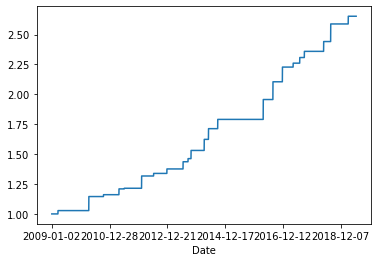

In [45]:
book['acc return'].plot()

In [46]:
book.tail()

,Adj Close,trade,return,acc return
Date,,,,
2019-06-18,290.984741,buy,1.0,2.652793
2019-06-19,291.641541,buy,1.0,2.652793
2019-06-20,294.427979,buy,1.0,2.652793
2019-06-21,294.000000,buy,1.0,2.652793
2019-06-24,293.640015,buy,1.0,2.652793


In [47]:
# plt.plot(book['acc return'])